In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
from scipy.ndimage import gaussian_filter1d


In [92]:
# time
t = np.arange(0, 100, .01)

# useful fragments
x_zero = np.zeros(1000)
x_ten = np.zeros(1000)
x_ten[:] = 10

x_rising = np.arange(0, 10, .01)
x_falling = np.arange(10, 0, -.01)

x_nan = np.zeros(1000)
x_nan[:] = np.nan

# noise
rng = np.random.default_rng()
add_noise = lambda arr: arr + rng.normal(0, 0.5, arr.shape)
smooth = lambda x, s: gaussian_filter1d(x, sigma=s, mode='nearest')


# Fused tarsal tip

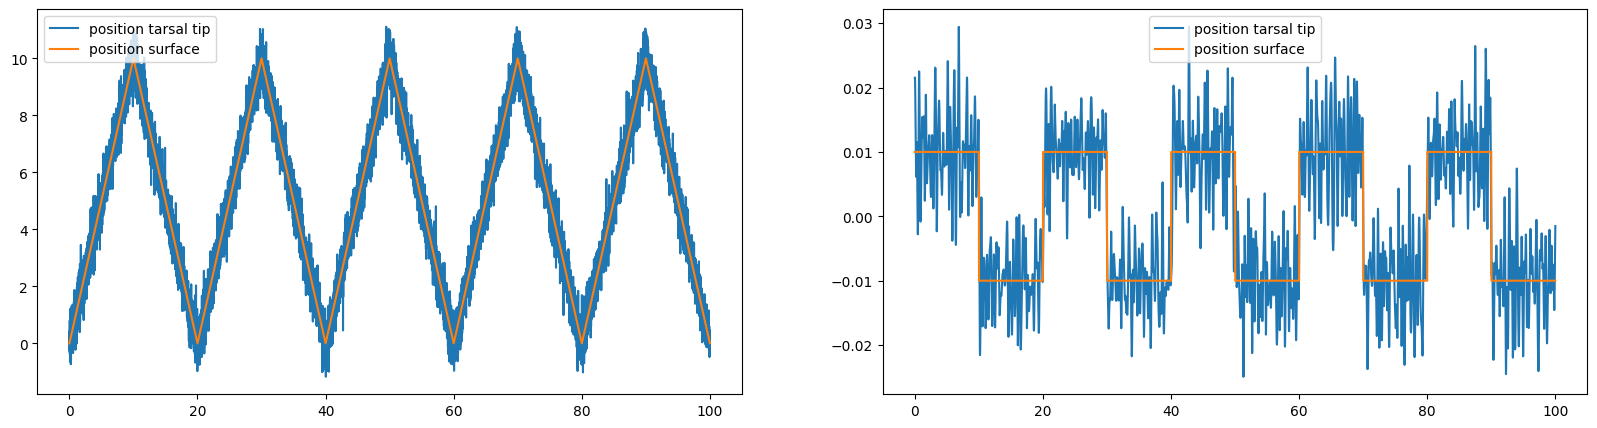

In [95]:
# position of tarsal tip
x = np.hstack([x_rising, x_falling] * 5)
x_tars = add_noise(x)
v_tars = np.gradient(smooth(x_tars, 10))

# target: position of surface
x_surf = np.hstack([x_rising, x_falling] * 5)
v_surf = np.gradient(x_surf)

# plot
fig, axarr = plt.subplots(figsize=(20, 5), ncols=2)
ax = axarr[0]
ax.plot(t, x_tars, label='position tarsal tip')
ax.plot(t, x_surf, label='position surface')
ax.legend()

ax = axarr[1]
ax.plot(t, v_tars, label='position tarsal tip')
ax.plot(t, v_surf, label='position surface')
ax.legend()

# Lift off

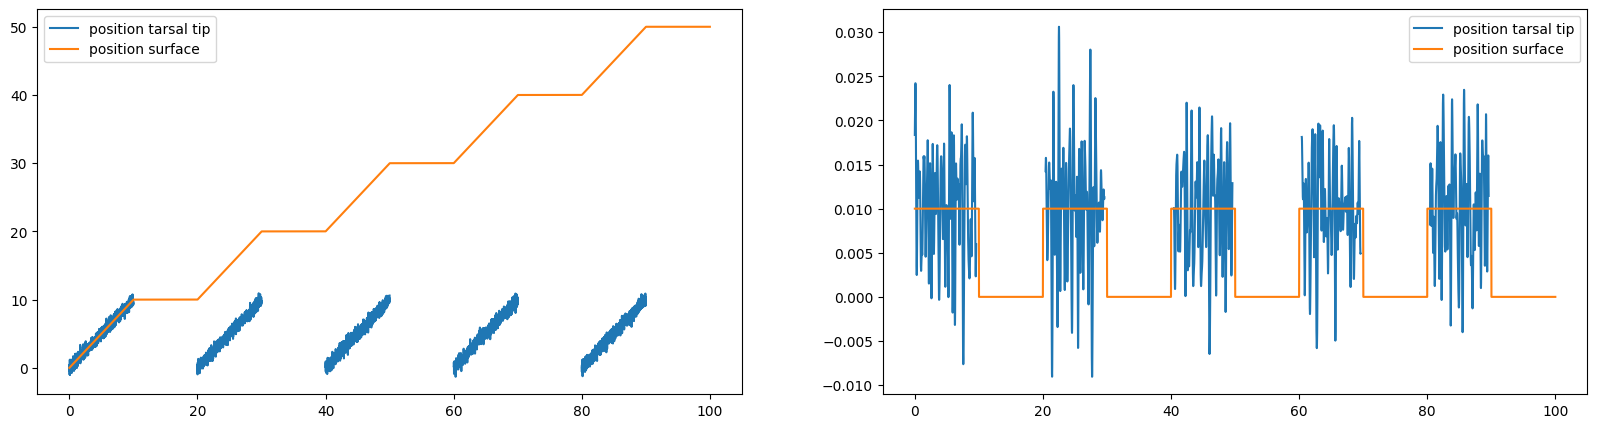

In [100]:
# position of tarsal tip
x = np.hstack([x_rising, x_nan] * 5)
x_tars = add_noise(x)
v_tars = np.gradient(smooth(x_tars, 10))

# target: position of surface
x = np.hstack([x_rising, x_ten])
x_surf = np.hstack([ x + 10*i for i in range(5) ])
v_surf = np.gradient(x_surf)

# plot
fig, axarr = plt.subplots(figsize=(20, 5), ncols=2)
ax = axarr[0]
ax.plot(t, x_tars, label='position tarsal tip')
ax.plot(t, x_surf, label='position surface')
ax.legend()

ax = axarr[1]
ax.plot(t, v_tars, label='position tarsal tip')
ax.plot(t, v_surf, label='position surface')
ax.legend()